# Pratique pandas

## imports

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## . head

In [5]:
df = pd.read_csv('BTC-EUR.csv')
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-12,7026.769043,7037.558105,4344.840332,4444.237305,4444.237305,4.826227e+10
1,2020-03-13,4486.296875,5254.104980,3672.950928,4993.677246,4993.677246,6.655904e+10


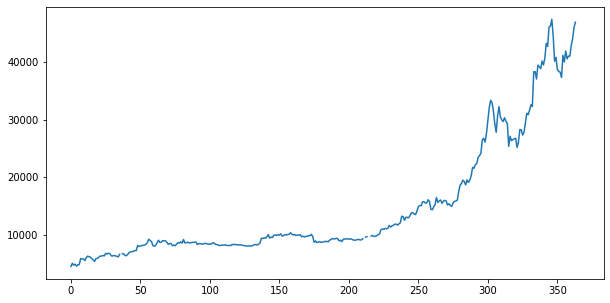

In [6]:
df['Close'].plot(figsize=(10,5))
plt.show()

## . default index

In [14]:
df.index

RangeIndex(start=0, stop=366, step=1)

## . time in absis

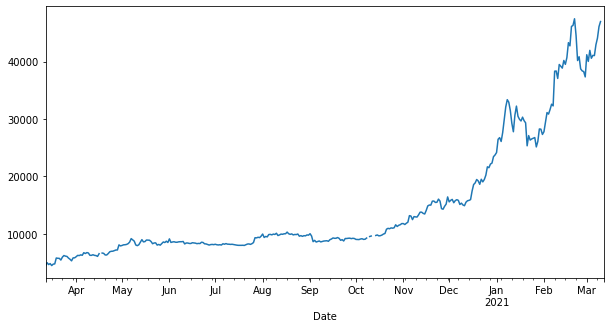

DatetimeIndex(['2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15',
               '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
               '2020-03-20', '2020-03-21',
               ...
               '2021-03-03', '2021-03-04', '2021-03-05', '2021-03-06',
               '2021-03-07', '2021-03-08', '2021-03-09', '2021-03-10',
               '2021-03-11', '2021-03-12'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

In [14]:
df = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)
df['Close'].plot(figsize=(10,5))
plt.show()

# verify new index
df.index

<AxesSubplot:xlabel='Date'>

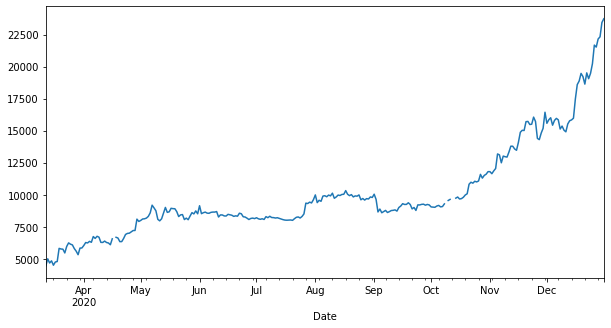

In [16]:
df['2020']['Close'].plot(figsize=(10,5))

<AxesSubplot:xlabel='Date'>

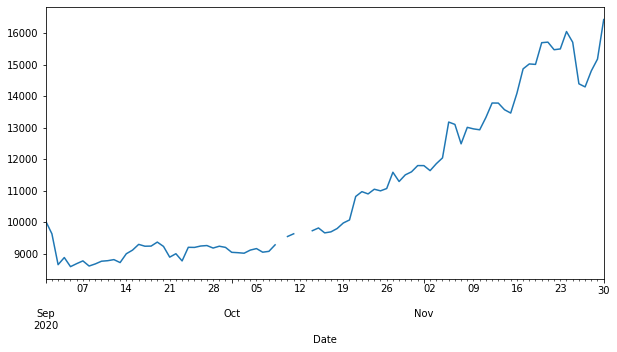

In [24]:
df['2020-09': '2020-11']['Close'].plot(figsize=(10,5))

### resample 

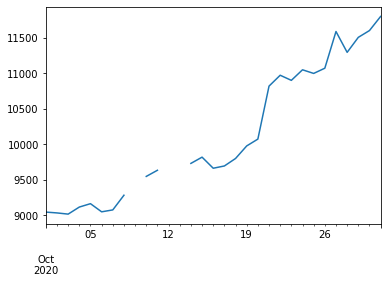

In [29]:
df.loc['2020-10', 'Close'].resample('M').plot()
plt.show()

# Assembler des dataset différents 

## Ethereum

<AxesSubplot:xlabel='Date'>

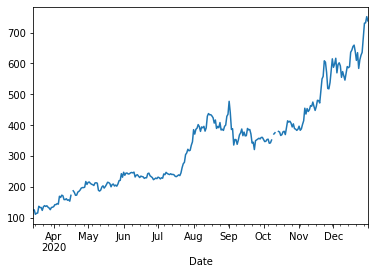

In [30]:
Eth = pd.read_csv('ETH-USD.csv', index_col='Date', parse_dates=True)
Eth['2020']['Close'].plot()

## Bitcoin

<AxesSubplot:xlabel='Date'>

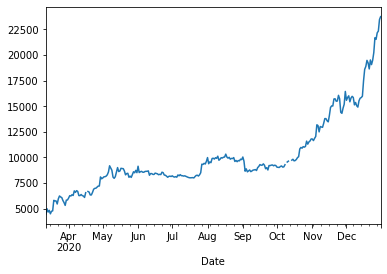

In [31]:
Bit = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)
Bit['2020']['Close'].plot()

## **Assemblage**

### how = inner|outer|left|right like SQL

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

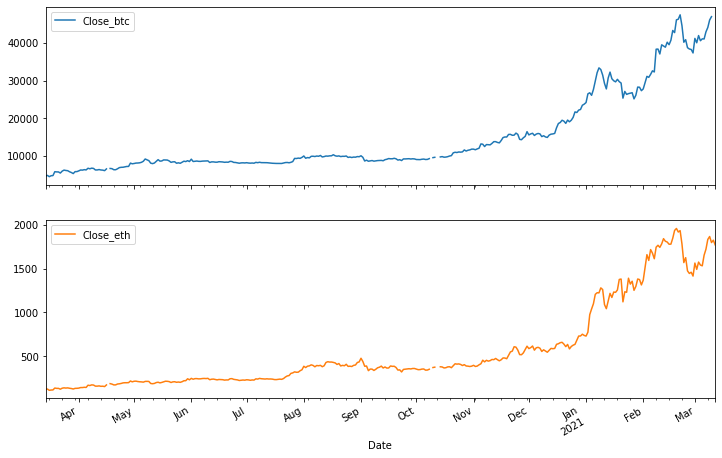

In [39]:
btc_eth = pd.merge(Bit, Eth, on='Date', how='inner', suffixes=('_btc','_eth'))
btc_eth[['Close_btc', 'Close_eth']].plot(subplots = True,figsize=(12,8))